In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
#importing the dataset
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### DATA SANITY CHECKS

In [5]:
#Checking the shape of thedata
train.shape

(1460, 81)

In [6]:
#describing the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
#DESCRIPTIVE STATS
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
#missing values
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [11]:
#duplicate values
train.duplicated().sum()

0

In [12]:
#describing the data
train.describe(include = "object")

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### DATA CEANING

In [ ]:
#copying the dataset
train1 = train.copy()
train1.head()

In [ ]:
mode1 = 'TA'
mode2 = 'Unf'
mode3 =  'SBrkr'

train.fillna({'GarageCond':mode1, 'GarageQual': mode1, 'GarageFinish':mode2, 'Electrical': mode3 }, inplace=True)


In [ ]:
#DROPPING COLUMNS WITH NUMEROUS MISSING VALUES
train = train.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'MasVnrType','FireplaceQu'], axis = 1)
train.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train.describe().T

In [ ]:
median1 = train['GarageYrBlt'].median()
median1

In [ ]:
train.fillna({'GarageYrBlt':median1}, inplace = True )

In [ ]:
median2 = train['LotFrontage'].median()
median2

In [ ]:
train.fillna({'LotFrontage':median2}, inplace = True)

In [ ]:
tr = train['LotArea'].sort_values(ascending = False)
tr

In [15]:
mode5 = train['Street'].mode()[0]
mode5

'Pave'

In [18]:
train['Street'] = train['Street'].fillna(mode5)

In [19]:
mode6 = train['SaleCondition'].mode()[0]
mode6

'Normal'

In [20]:
train['SaleCondition'] = train['SaleCondition'].fillna(mode6)

** Filling Numerical  column LotFrontage, we visualize first**

In [24]:
import matplotlib.pyplot  as plt
import seaborn as sns

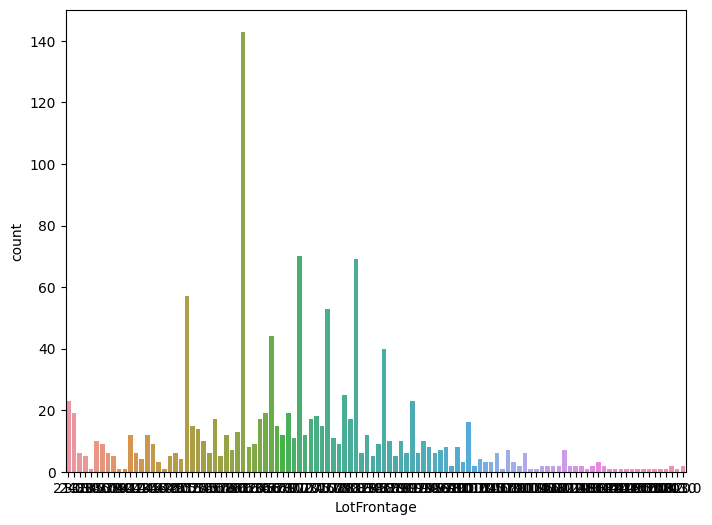

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='LotFrontage')
plt.show()

**The data is skewed so we fill with median**

In [27]:
median4 = train['LotFrontage'].median()
median4

69.0

In [28]:
train['LotFrontage'] = train['LotFrontage'].fillna(mode6)

In [29]:
train['LotFrontage'].isnull().sum()

0

**Filling the GarageType numeric Data Type**

Visualizing the collumn

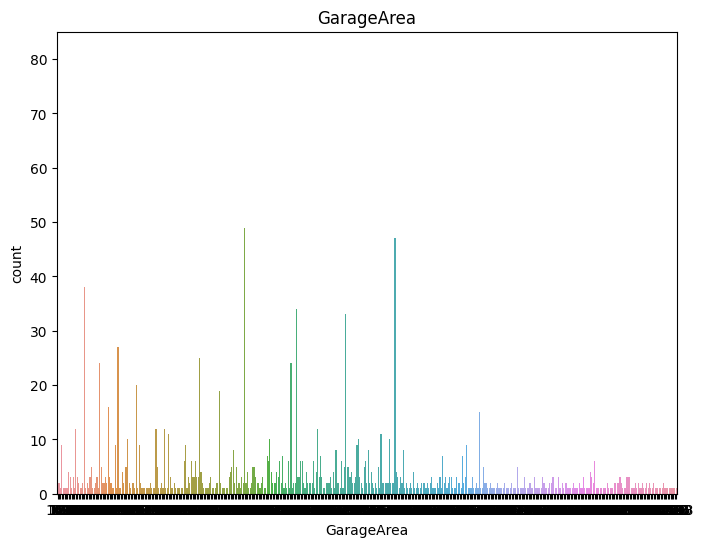

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='GarageArea')
plt.title("GarageArea")
plt.show()

In [37]:
median5 = train['GarageArea'].median()
median5

480.0

In [38]:
train['LotFrontage'] = train['LotFrontage'].fillna(median5)

****